<a href="https://colab.research.google.com/github/Afzal786/Soft_Computing/blob/master/MIT2019072_SOC2020_PCA_River_NonRiver_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from PIL import Image
import numpy as np
from random import randint
import math
import matplotlib.pyplot as plt


#Demo image is saved in order to correctly get the river points 
img = Image.open('name.png','r')

#Converting to gray Scale image
img = img.convert('1')

pix_val = list(img.getdata())

#Converting it into a 512 X 512 matrix
pix_val =np.array(pix_val).reshape(512,512)

#List to store the river points
riv = []

#If the value of the matrix is 255 then it is a river point
for i in range(512):
  for j in range(512):
    if(pix_val[i,j]==255):
      riv.append([i,j])

#Reading the satellite images
r = Image.open('1.gif','r')
g = Image.open('2.gif','r')
b = Image.open('3.gif','r')
a = Image.open('4.gif','r')

#Converting the images in the array format
pix_val_r = list(r.getdata())
pix_val_r =np.array(pix_val_r).reshape(512,512)
pix_val_g = list(g.getdata())
pix_val_g =np.array(pix_val_g).reshape(512,512)
pix_val_b = list(b.getdata())
pix_val_b =np.array(pix_val_b).reshape(512,512)
pix_val_a = list(a.getdata())
pix_val_a =np.array(pix_val_a).reshape(512,512)

#PCA function is defined in order to reduce the dimensional of the data
def PCA(X,val):
    M = np.mean(X.T, axis=1)
    C = X - M #Normalizing the input data
    V = np.cov(C.T) # Co - variance matrix calculation
    
    values,vectors = np.linalg.eig(V) # Eigen value calculation

    
    x = np.argsort(values) #Sorting according to the maximum value of the eigen values 
    x = x[::-1]
    
    vectors = vectors[:,x]
    values = values[x]
    if val >= 0 and val <= X.shape[1]:
        vectors = vectors[:,range(val)].real
    #Calculating the projected data
    P = vectors.T.dot(C.T) 
    return P.T


val = 4


X = np.array((pix_val_r,pix_val_g,pix_val_b,pix_val_a)).reshape(4,512*512).T

# Function call to the PCA function
X = PCA(X,val)

X.shape

(262144, 4)

In [0]:
#Coordinates for the non-river points
x_nonriver = []
y_nonriver = []

for i in range(2000):
  x_nonriver.append(randint(1, 120))
  x_nonriver.append(randint(240, 500))

for i in range(4000):
  y_nonriver.append(randint(1,512))

#Coordinates for the river points
x_river = []
y_river = []

for x in range(500):
  a = randint(0,len(riv))
  x_river.append(riv[a][0])
  y_river.append(riv[a][1])

#function to calculate mean of the data
def mean(X):
  return np.mean(X.T, axis=1)


river = []
for i in range(len(x_river)) :
  x = x_river[i]
  y = y_river[i]
  river = np.append(river,X[512*x+y]).reshape(-1,val)
  
nonriver = []

for i in range(len(x_nonriver)) :
  x = x_nonriver[i]
  y = y_nonriver[i]
  nonriver = np.append(nonriver,X[512*x+y]).reshape(-1,val)
  
n = river.shape[1]

#calculating mean of the river data
river_mean = mean(river)

#calculating mean of the non-river data
nonriver_mean = mean(nonriver)

#calculating co-variance of the river data
cov_mat_river = np.cov(river.T).reshape(-1,val)

#calculating co-variance of the river data
cov_mat_nonriver= np.cov(nonriver.T).reshape(-1,val)


In [0]:
import math

test = X.T

#Calculating inverse co-variance of the river data
inv_cov_r = np.linalg.inv(cov_mat_river)

#Calculating inverse co-variance of the non-river data
inv_cov_nr = np.linalg.inv(cov_mat_nonriver)




#using the bayes algorithm to find whether a point is of river class or non-river class

def bayes(P2):
  out_img= []
  for i in range(0,512*512):
    r = (((test[:,i]-river_mean).reshape(n,1)).T)
    r1 = np.matmul(r,inv_cov_r)
    r_class = np.matmul(r1,(((test[:,i]-river_mean).reshape(n,1))))
  
    nr = (((test[:,i]-nonriver_mean).reshape(n,1)).T)
    nr1 = np.matmul(nr,inv_cov_nr)
    nr_class = np.matmul(nr1,(((test[:,i]-nonriver_mean).reshape(n,1))))
  
  
    if(r_class > 709):
      r_class = 0
    
    p1 = (-0.5)*1/math.sqrt(np.linalg.det(cov_mat_river))*(math.exp(r_class))
    #P2 = 0.09
    p2 = (-0.5)*1/math.sqrt(np.linalg.det(cov_mat_nonriver))*math.exp(nr_class)
    P1 = 1-P2
    if (p1*P1 > p2*P2):
      out_img.append(255)
    else :
      out_img.append(0)
  
  return out_img


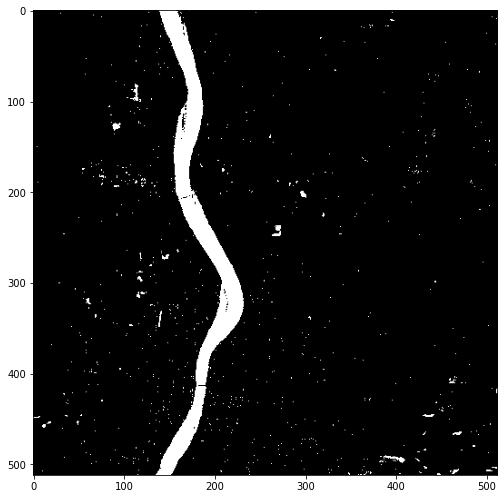

In [7]:
# At P1 = 0.01 and P2 = 0.09
out_img1 = bayes(0.09)
out_img1 = np.array(out_img1,dtype=np.uint8).reshape(512,512)

plt.subplot(1,1,1)
plt.imshow(out_img1, cmap="gray")
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

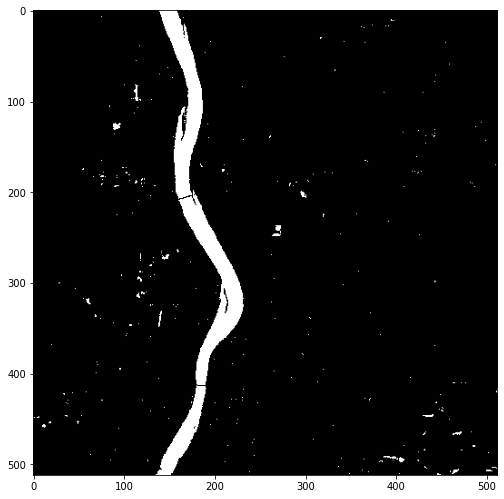

In [8]:
# At P1 = 0.05 and P2 = 0.05
out_img2 = bayes(0.05)
out_img2 = np.array(out_img2,dtype=np.uint8).reshape(512,512)

plt.subplot(1,1,1)
plt.imshow(out_img2, cmap="gray")
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()


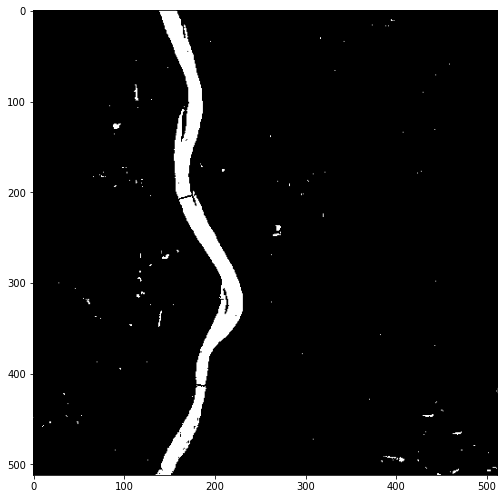

In [9]:
# At P1 = 0.08 and P2 = 0.02
out_img3 = bayes(0.02)
out_img3 = np.array(out_img3,dtype=np.uint8).reshape(512,512)

plt.subplot(1,1,1)
plt.imshow(out_img3, cmap="gray")
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()